In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
alphagraph = torch.load('/home/sjf/eegall/dataex/99alphaafteraggregation.pt')
betagraph = torch.load('/home/sjf/eegall/dataex/99betaafteraggregation.pt')
deltagraph = torch.load('/home/sjf/eegall/dataex/99deltaafteraggregation.pt')
gammagraph = torch.load('/home/sjf/eegall/dataex/99gammaafteraggregation.pt')
thetagraph = torch.load('/home/sjf/eegall/dataex/99thetaafteraggregation.pt')

In [8]:
a.shape

torch.Size([12, 32, 32])

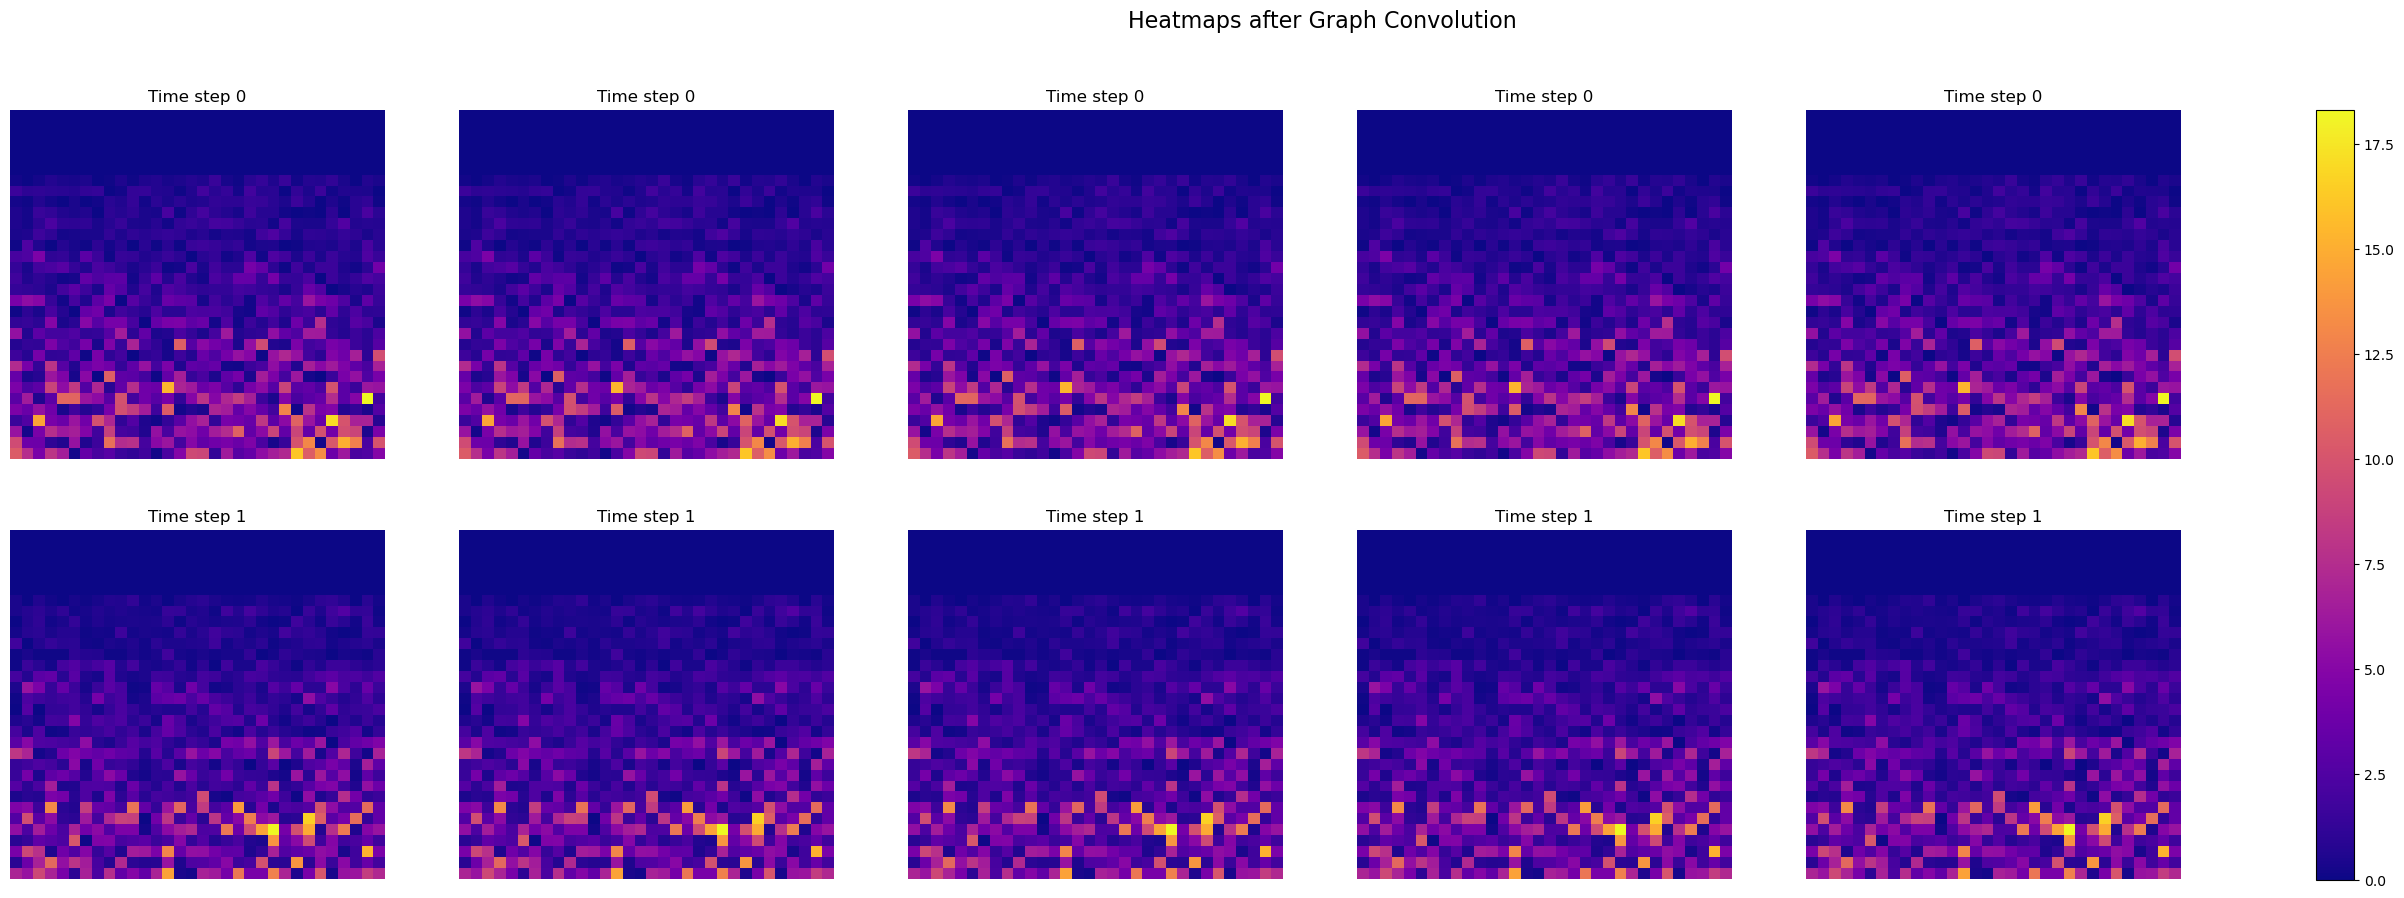

In [17]:
data1 = np.abs(alphagraph)
data2 = np.abs(alphagraph)
data3 = np.abs(alphagraph)
data4 = np.abs(alphagraph)
data5 = np.abs(alphagraph)

# 设置图形大小和子图网格
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(35, 10))

# 确保子图的数量与时间步数一致
axes = axes.flatten()

# 绘制每个时间步的热力图=
ax = axes[0]
cax = ax.imshow(data1[0], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {0}')
ax.axis('off')

ax = axes[1]
cax = ax.imshow(data2[0], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {0}')
ax.axis('off')

ax = axes[2]
cax = ax.imshow(data3[0], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {0}')
ax.axis('off')

ax = axes[3]
cax = ax.imshow(data4[0], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {0}')
ax.axis('off')

ax = axes[4]
cax = ax.imshow(data5[0], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {0}')
ax.axis('off')


ax = axes[5]
cax = ax.imshow(data1[1], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {1}')
ax.axis('off')

ax = axes[6]
cax = ax.imshow(data2[1], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {1}')
ax.axis('off')

ax = axes[7]
cax = ax.imshow(data3[1], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {1}')
ax.axis('off')

ax = axes[8]
cax = ax.imshow(data4[1], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {1}')
ax.axis('off')

ax = axes[9]
cax = ax.imshow(data5[1], aspect='auto', cmap='plasma')
ax.set_title(f'Time step {1}')
ax.axis('off')
    # cbar = fig.colorbar(cax,ax)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# 添加一个颜色条
cbar = fig.colorbar(cax, ax=axes, orientation='vertical')
# cbar.set_label('Amplitude')

plt.suptitle('Heatmaps after Graph Convolution', fontsize=16)
plt.savefig('/home/sjf/eegall/dataex/afteraggregation.png', transparent=True,dpi=600)
plt.show()

In [12]:
import re

In [13]:
def extract_loss_values(file_path):
    loss_values = []
    with open(file_path, 'r') as file:
        for line in file:
            # 使用正则表达式提取损失值
            match = re.search(r"Loss: ([\d\.]+)", line)
            if match:
                loss_value = float(match.group(1))
                loss_values.append(loss_value)
    return loss_values

In [14]:
file_path = '/home/sjf/eegall/withlimits/nohup.out'
loss_values = extract_loss_values(file_path)

In [16]:
type(loss_values)

list

In [17]:
loss_values = np.array(loss_values)

In [19]:
np.isnan(loss_values).any()

False

In [20]:
len(loss_values)

227178

In [24]:
len(loss_values)

7572.6

In [25]:
123*3000*10

3690000

In [26]:
227178-3690000

-3462822

In [27]:
base_de = torch.load('/home/sjf/eegall/data/FACED/all_nwrebase_de_features.pt')

In [28]:
base_de.shape

torch.Size([123, 312, 32, 7])

In [35]:
figdata = torch.mean(base_de,dim=-1)

Text(0.04, 0.5, 'Value')

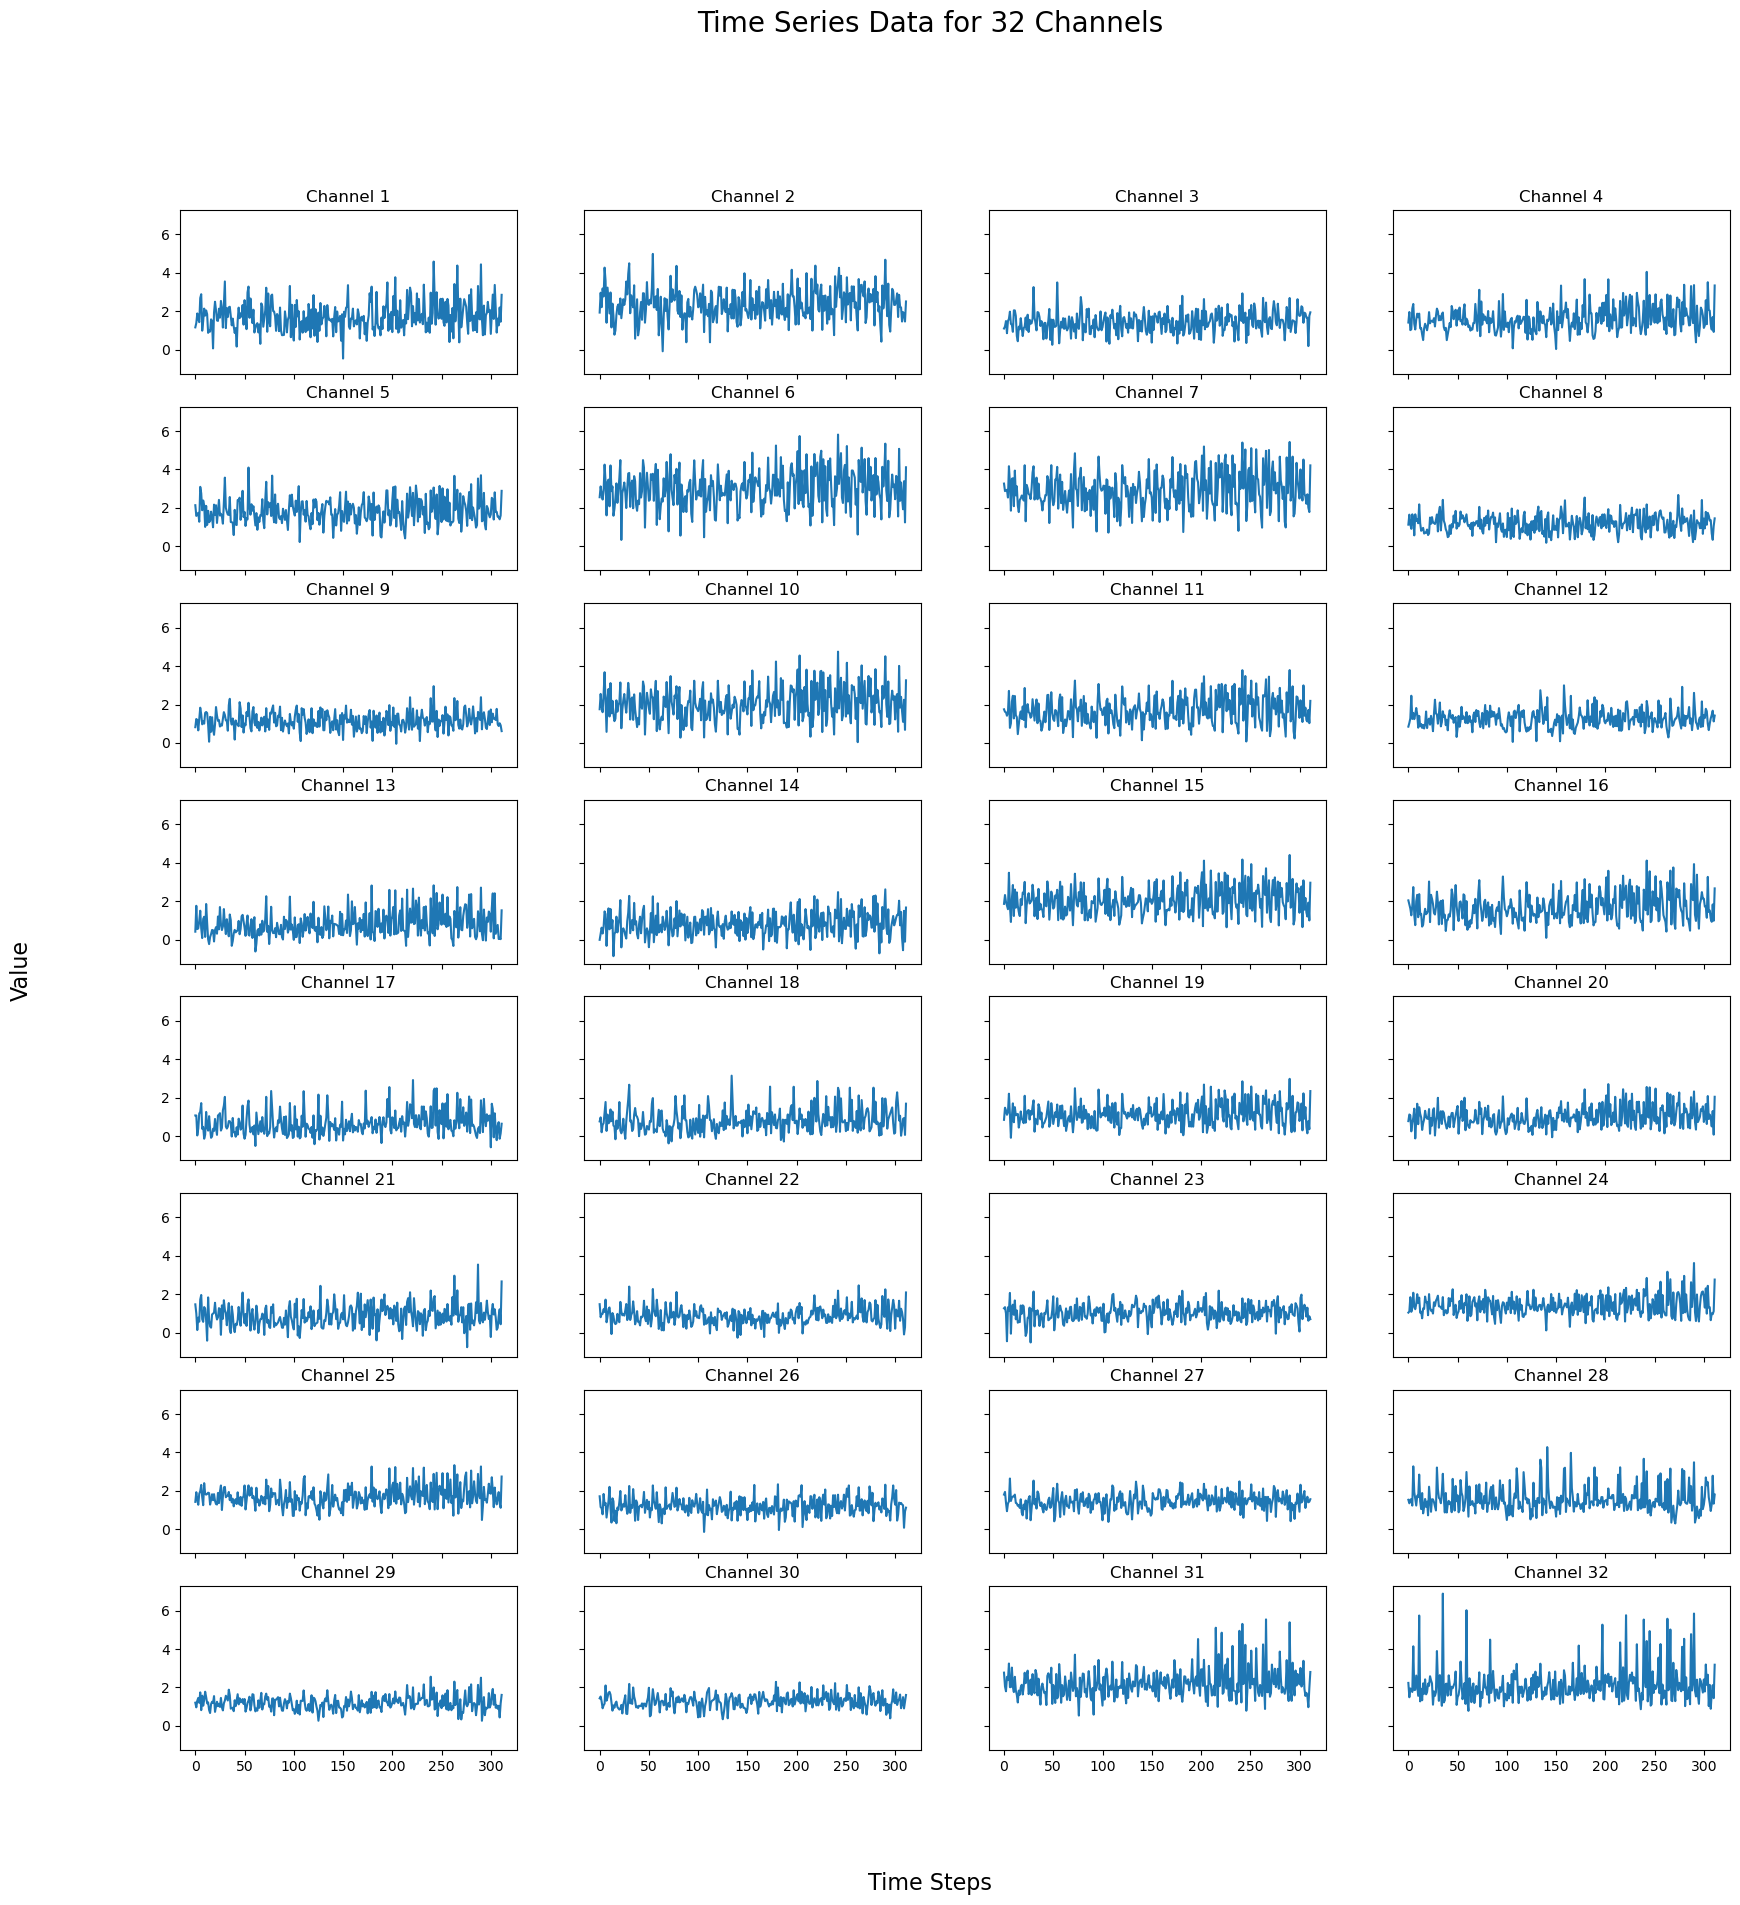

In [34]:
data = figdata
fig, axes = plt.subplots(8, 4, figsize=(20, 20), sharex=True, sharey=True)

# 绘制每个通道的时间序列数据
for channel in range(32):
    ax = axes[channel // 4, channel % 4]
    ax.plot(data[:, channel])
    ax.set_title(f'Channel {channel + 1}')

# 设置整体图形标题和标签
fig.suptitle('Time Series Data for 32 Channels', fontsize=20)
fig.text(0.5, 0.04, 'Time Steps', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Value', va='center', rotation='vertical', fontsize=16)

In [36]:
figdata = figdata[0]

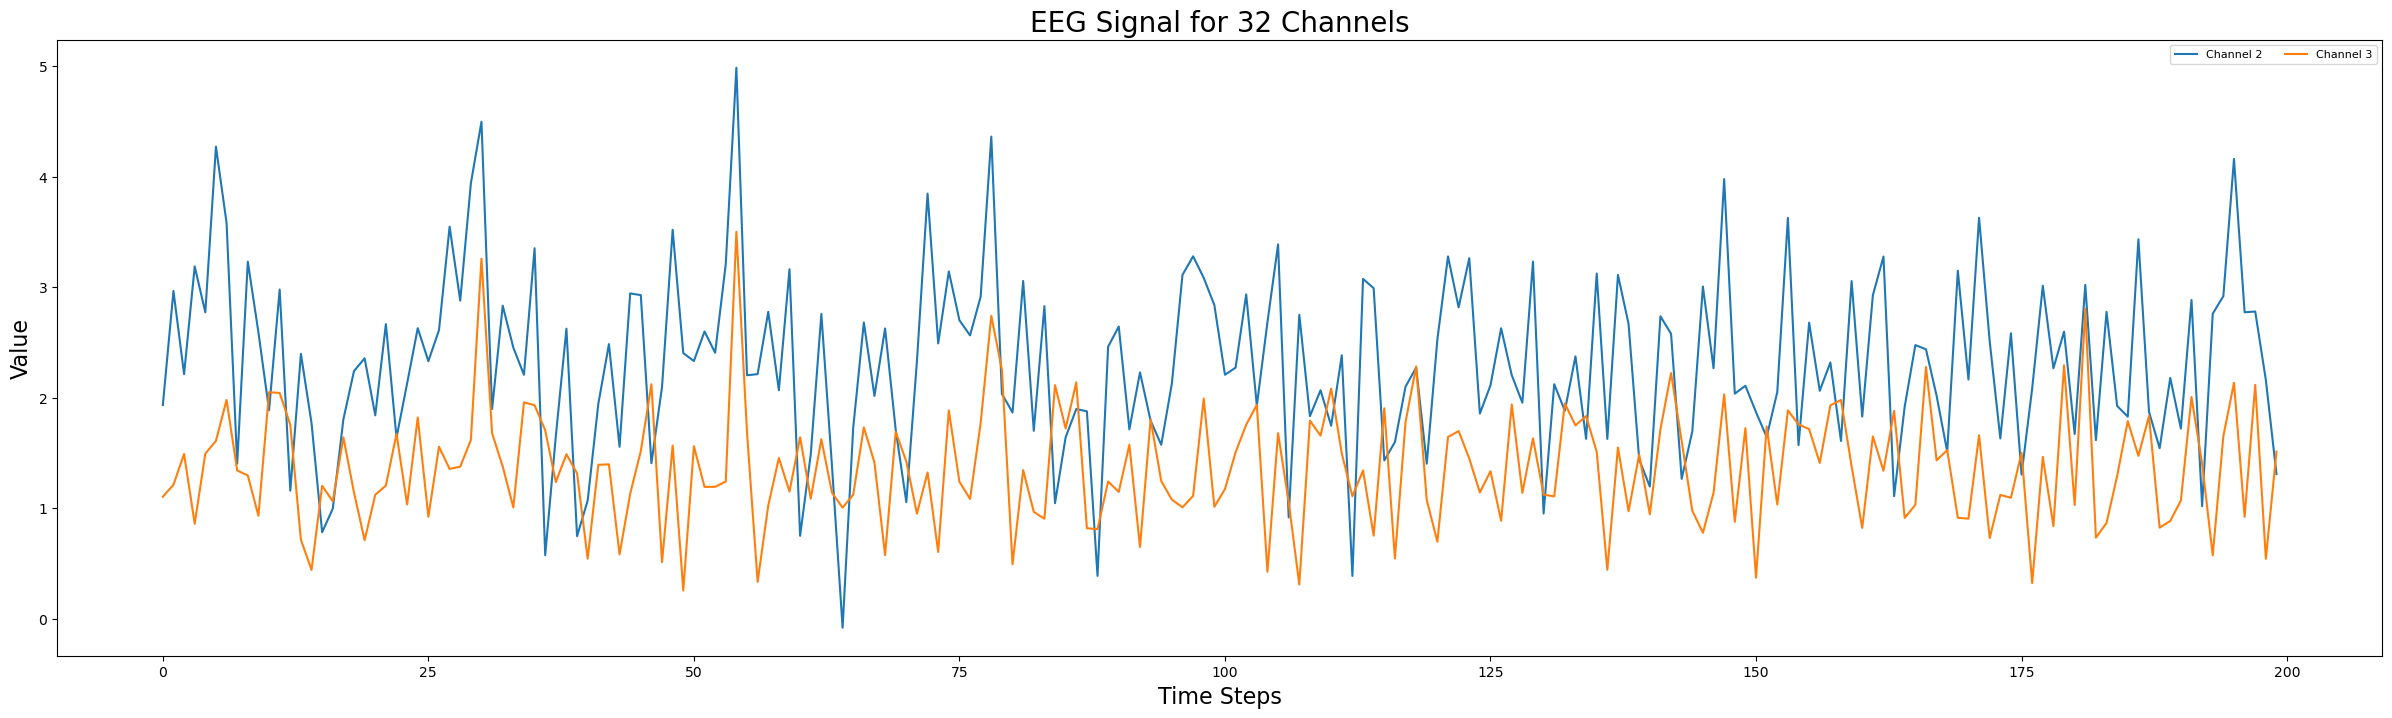

In [43]:
data = figdata
plt.figure(figsize=(30,8))
for channel in range(1,3):
    plt.plot(data[:200, channel], label=f'Channel {channel + 1}')
# 设置图形标题和标签
plt.title('EEG Signal for 32 Channels', fontsize=20)
plt.xlabel('Time Steps', fontsize=16)
plt.ylabel('Value', fontsize=16)

# 显示图例
plt.legend(loc='upper right', ncol=2, fontsize=8)
plt.savefig('/home/sjf/eegall/dataex/eegsignalchan.png')
# 显示图形
plt.show()

In [44]:
basegraph = torch.load('/home/sjf/eegall/data/FACED/faced_rebase_graph.pt')

In [45]:
basegraph.shape

(123, 312, 32, 32)

In [46]:
baseda = basegraph[0,:,1,2]

In [47]:
baseda.shape

(312,)

In [21]:
deapacc_1 = torch.load('/home/sjf/eegall/results/norm-lr1e-05DEAP10_38_5000_scebaseseed74_acc.pt')
facedacc_1 = torch.load('/home/sjf/eegall/results/norm-lr1e-05FACED10_11_3000_scebaseseed74_acc.pt')
deapacc_3 = torch.load('/home/sjf/eegall/results/norm-lr3e-05DEAP10_38_5000_scebaseseed74_acc.pt')
facedacc_3 = torch.load('/home/sjf/eegall/results/norm-lr3e-05FACED10_11_3000_scebaseseed74_acc.pt')
deapacc_5 = torch.load('/home/sjf/eegall/results/norm-lr5e-05DEAP10_38_10000_scebaseseed74_acc.pt')
facedacc_5 = torch.load('/home/sjf/eegall/results/norm-lr5e-05FACED10_11_3000_scebaseseed74_acc.pt')

In [42]:
deapacc = [0.9725,0.9725,0.9627]
facedacc = [0.9566,0.9533,0.9533]

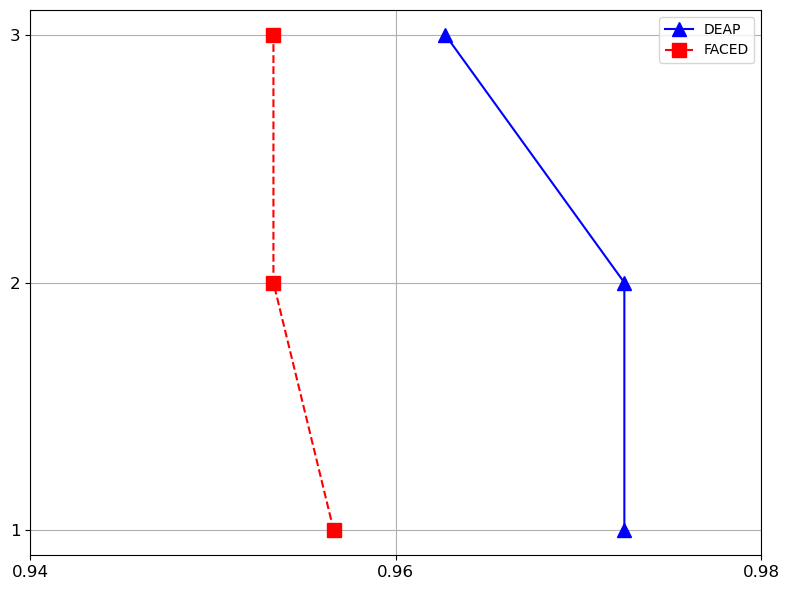

In [43]:
indices = range(1, 4)  # 或者直接用 list(range(1, 6))

# 创建图形并设置大小
plt.figure(figsize=(8, 6))

# 绘制第一组数据的折线图
plt.plot(deapacc, indices, marker='^', markersize=10,linestyle='-', color='b', label='DEAP')

# 绘制第二组数据的折线图
plt.plot(facedacc, indices, marker='s', markersize=10,linestyle='--', color='r', label='FACED')

# 添加标签和标题
# plt.xlabel('Index', fontsize=14)
# plt.ylabel('Accuracy', fontsize=14)
# plt.title('Accuracy Comparison Between Two Models', fontsize=16)

# 设置纵坐标刻度为索引值
plt.xticks([0.94,0.96,0.98], fontsize=12)
plt.yticks(indices,fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('/home/sjf/eegall/dataex/lrcompar.png',dpi=600)

In [37]:
deap_acc = [0.9731,0.9737,0.9716,0.9728,0.9744]
faced_acc = [0.9523,0.9487,0.9489,0.s9485,0.9479]

In [12]:
import matplotlib.pyplot as plt

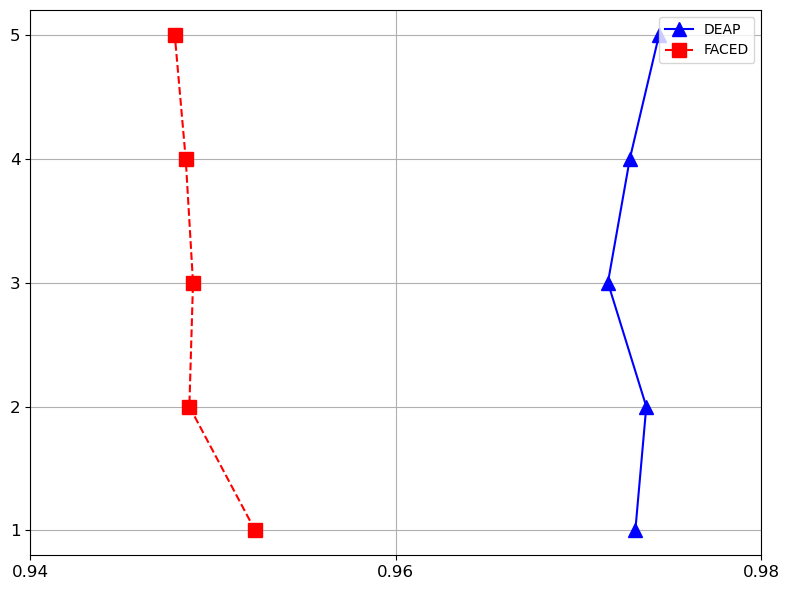

In [39]:
indices = range(1, 6)  # 或者直接用 list(range(1, 6))

# 创建图形并设置大小
plt.figure(figsize=(8, 6))

# 绘制第一组数据的折线图
plt.plot(deap_acc, indices, marker='^', markersize=10,linestyle='-', color='b', label='DEAP')

# 绘制第二组数据的折线图
plt.plot(faced_acc, indices, marker='s', markersize=10,linestyle='--', color='r', label='FACED')

# 添加标签和标题
# plt.xlabel('Index', fontsize=14)
# plt.ylabel('Accuracy', fontsize=14)
# plt.title('Accuracy Comparison Between Two Models', fontsize=16)

# 设置纵坐标刻度为索引值
plt.xticks([0.94,0.96,0.98], fontsize=12)
plt.yticks(indices,fontsize=12)
plt.legend()
plt.grid(True)



plt.tight_layout()
plt.savefig('/home/sjf/eegall/dataex/params.png',dpi=600)

In [69]:
import torch
import numpy as np

In [79]:
b30loss = torch.load('/home/sjf/eegall/lossre/lr5e-05DEAP10_30_10000_scebaseseed74nwDEAPloss.pt')
b32loss = torch.load('/home/sjf/eegall/lossre/lr5e-05DEAP10_32_10000_scebaseseed74nwDEAPloss.pt')
b34loss = torch.load('/home/sjf/eegall/lossre/lr5e-05DEAP10_34_10000_scebaseseed74nwDEAPloss.pt')
b36loss = torch.load('/home/sjf/eegall/lossre/lr5e-05DEAP10_36_10000_scebaseseed74nwDEAPloss.pt')
b38loss = torch.load('/home/sjf/eegall/lossre/lr5e-05DEAP10_38_10000_scebaseseed74nwDEAPloss.pt')

In [80]:
b30loss = np.array(b30loss)
b32loss = np.array(b32loss)
b34loss = np.array(b34loss)
b36loss = np.array(b36loss)
b38loss = np.array(b38loss)

In [81]:
b30loss.shape

(10, 10000)

In [82]:
b30mean_losses = np.mean(b30loss, axis=0)
b32mean_losses = np.mean(b32loss, axis=0)
b34mean_losses = np.mean(b34loss, axis=0)
b36mean_losses = np.mean(b36loss, axis=0)
b38mean_losses = np.mean(b38loss, axis=0)

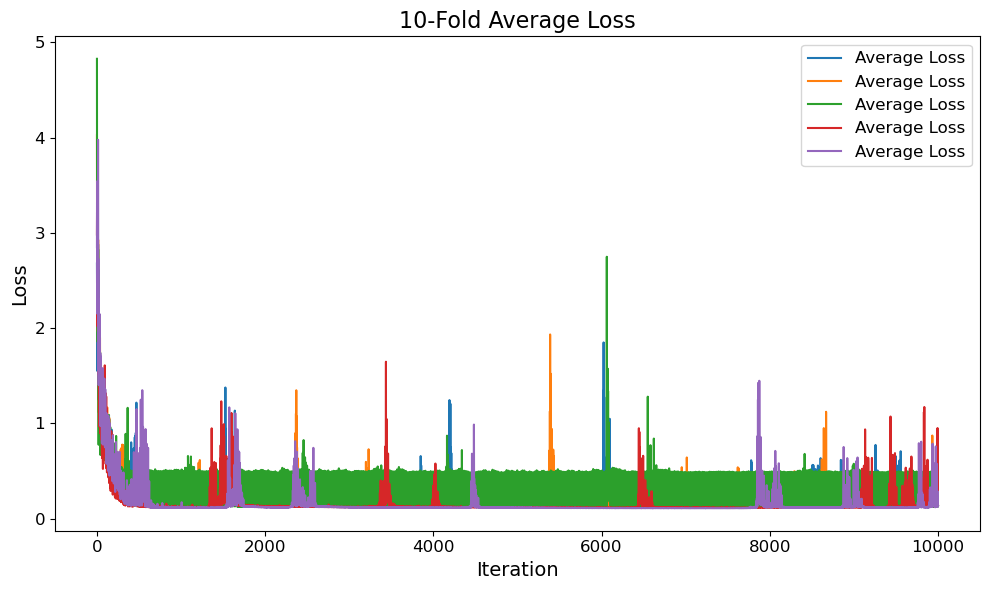

In [84]:
plt.figure(figsize=(10, 6))

# 绘制平均损失的折线图
plt.plot(b30mean_losses, linestyle='-', label='Average Loss')
plt.plot(b32mean_losses, linestyle='-', label='Average Loss')
plt.plot(b34mean_losses, linestyle='-', label='Average Loss')
plt.plot(b36mean_losses, linestyle='-', label='Average Loss')
plt.plot(b38mean_losses, linestyle='-', label='Average Loss')

# 添加标签和标题
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('10-Fold Average Loss', fontsize=16)

# 设置 x 轴和 y 轴刻度的字体大小
values = np.arange(0, 3.2, 0.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示图例
plt.legend(fontsize=12)

# 显示网格
# plt.grid(True, linestyle='--', alpha=0.7)

# 确保图像紧凑显示
plt.tight_layout()

# 显示图像
plt.show()

In [88]:
losses = []
losses.append(b30mean_losses)
losses.append(b32mean_losses)
losses.append(b34mean_losses)
losses.append(b36mean_losses)
losses.append(b38mean_losses)

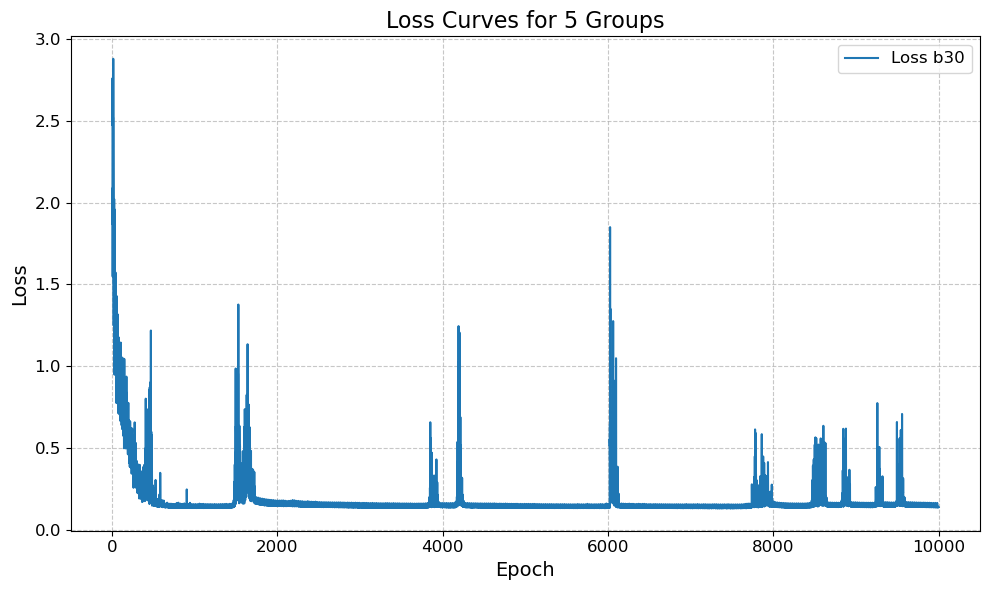

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))

# 为每组损失绘制折线图
ax.plot(b30mean_losses, label=f'Loss b30')
# ax.plot(b32mean_losses, label=f'Loss b32')
# ax.plot(b34mean_losses, label=f'Loss b34')
# ax.plot(b36mean_losses, label=f'Loss b36')
# ax.plot(b38mean_losses, label=f'Loss b38')


# 添加标签和标题
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.set_title('Loss Curves for 5 Groups', fontsize=16)

# 设置 x 轴和 y 轴刻度的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 显示图例
ax.legend(fontsize=12)

# 显示网格
ax.grid(True, linestyle='--', alpha=0.7)

# 确保图像紧凑显示
fig.tight_layout()

# 显示图像
plt.show()

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [107]:
s_arousal_deapacc = torch.load('/home/sjf/eegall/results/scere/Arousal-norm-lr5e-05DEAP10_38_500_scebaseseed74_acc.pt')
s_arousal_facedacc = torch.load('/home/sjf/eegall/results/scere/Arousal-norm-lr5e-05FACED10_11_500_scebaseseed74_acc.pt')
s_valence_deapacc = torch.load('/home/sjf/eegall/results/scere/Valence-norm-lr5e-05DEAP10_38_500_scebaseseed74_acc.pt')
s_valence_facedacc = torch.load('/home/sjf/eegall/results/scere/Valence-norm-lr5e-05FACED10_11_500_scebaseseed74_acc.pt')

In [108]:
# Cross entropy
c_arousal_deapacc = torch.load('/home/sjf/eegall/results/cere/Arousal-norm-lr5e-05DEAP10_38_500_cebaseseed74_acc.pt')
c_arousal_facedacc = torch.load('/home/sjf/eegall/results/cere/Arousal-norm-lr5e-05FACED10_11_500_cebaseseed74_acc.pt')
c_valence_deapacc = torch.load('/home/sjf/eegall/results/cere/Valence-norm-lr5e-05DEAP10_38_500_cebaseseed74_acc.pt')
c_valence_facedacc = torch.load('/home/sjf/eegall/results/cere/Valence-norm-lr5e-05FACED10_11_500_cebaseseed74_acc.pt')

In [109]:
s_arousal_deapacc_array = np.mean(s_arousal_deapacc,axis=0)
s_arousal_facedacc_array = np.mean(s_arousal_facedacc,axis=0)
s_valence_deapacc_array = np.mean(s_valence_deapacc,axis=0)
s_valence_facedacc_array = np.mean(s_valence_facedacc,axis=0)

In [110]:
c_arousal_deapacc_array = np.mean(c_arousal_deapacc,axis=0)
c_arousal_facedacc_array = np.mean(c_arousal_facedacc,axis=0)
c_valence_deapacc_array = np.mean(c_valence_deapacc,axis=0)
c_valence_facedacc_array = np.mean(c_valence_facedacc,axis=0)

In [89]:
arousal_deapacc_array = np.insert(arousal_deapacc_array,0,[0.0,0.35567127,0.45567127,0.55322378,0.69812124, 0.87651171])
arousal_facedacc_array = np.insert(arousal_facedacc_array,0,[0.0,0.45567127,0.55567127,0.65322378,0.79812124, 0.81651171])
valence_deapacc_array = np.insert(valence_deapacc_array,0,[0.0,0.38514157,0.48514157,0.50322378,0.64812124, 0.86651171])
valence_facedacc_array = np.insert(valence_facedacc_array,0,[0.0,0.42561127,0.52561127,0.60322348,0.74142124, 0.80159171])

In [111]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

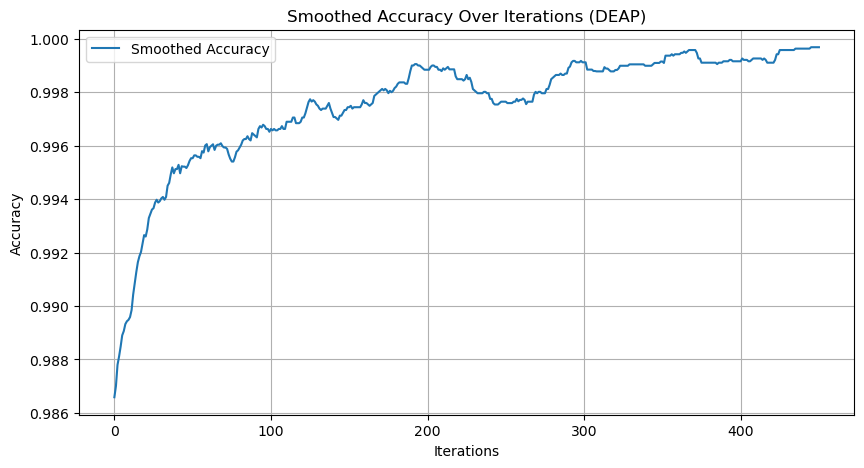

In [112]:
window_size = 50
smoothed_accuracy = moving_average(s_arousal_deapacc_array, window_size)

# 创建一个x轴的数组，表示训练的迭代次数或时间步数
iterations = range(len(smoothed_accuracy))

# 绘制平滑后的准确度变化曲线
plt.figure(figsize=(10, 5))
plt.plot(iterations, smoothed_accuracy, label='Smoothed Accuracy')

# 添加标题和标签
plt.title('Smoothed Accuracy Over Iterations (DEAP)')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()

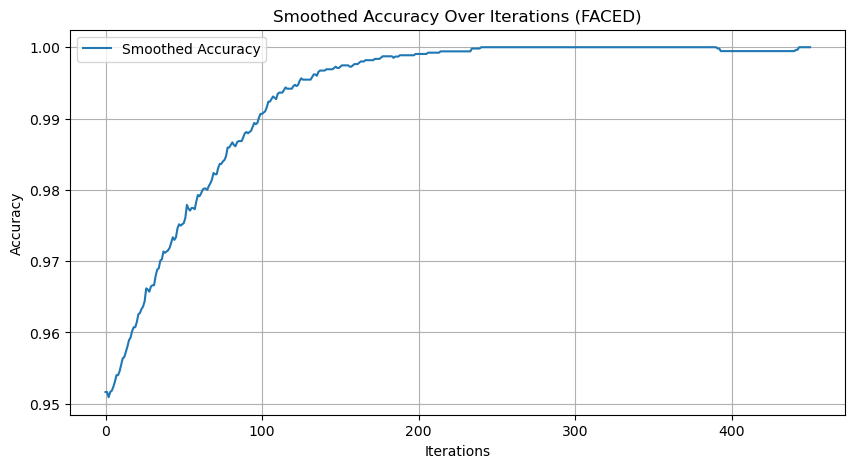

In [113]:
window_size = 50
smoothed_accuracy = moving_average(s_arousal_facedacc_array, window_size)

# 创建一个x轴的数组，表示训练的迭代次数或时间步数
iterations = range(len(smoothed_accuracy))

# 绘制平滑后的准确度变化曲线
plt.figure(figsize=(10, 5))
plt.plot(iterations, smoothed_accuracy, label='Smoothed Accuracy')

# 添加标题和标签
plt.title('Smoothed Accuracy Over Iterations (FACED)')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()

In [93]:
len(arousal_deapacc_array)

506

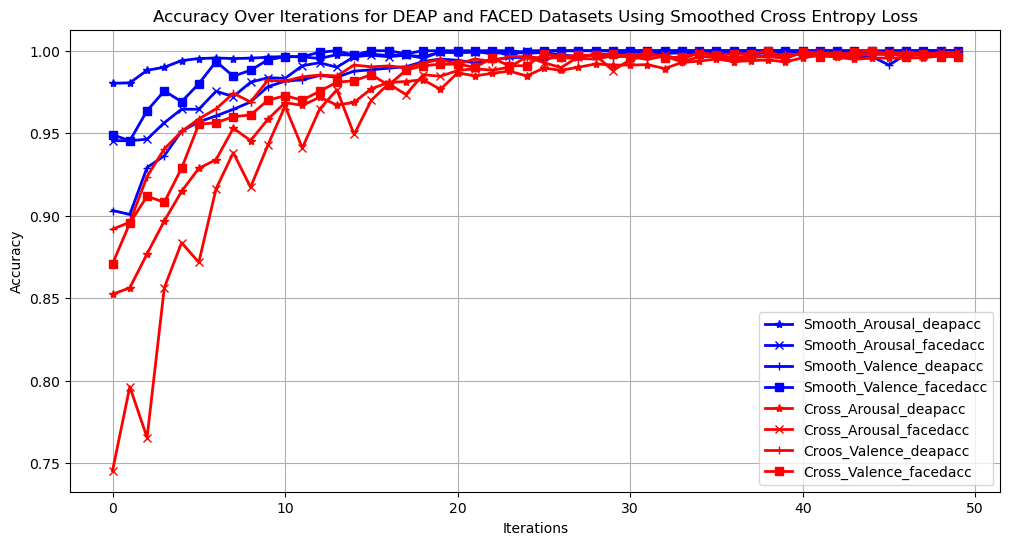

In [119]:
# 创建一个x轴的数组，表示训练的迭代次数或时间步数
# arousal_deapacc_array = np.mean(arousal_deapacc,axis=0)
# arousal_facedacc_array = np.mean(arousal_facedacc,axis=0)
# valence_deapacc_array = np.mean(valence_deapacc,axis=0)
# valence_facedacc_array = np.mean(valence_facedacc,axis=0)
window_size = 10
smoothed_accuracy1 = moving_average(s_arousal_deapacc_array, window_size)[::10]
smoothed_accuracy2 = moving_average(s_arousal_facedacc_array, window_size)[::10]
smoothed_accuracy3 = moving_average(s_valence_deapacc_array, window_size)[::10]
smoothed_accuracy4 = moving_average(s_valence_facedacc_array, window_size)[::10]
smoothed_accuracy5 = moving_average(c_arousal_deapacc_array, window_size)[::10]
smoothed_accuracy6 = moving_average(c_arousal_facedacc_array, window_size)[::10]
smoothed_accuracy7 = moving_average(c_valence_deapacc_array, window_size)[::10]
smoothed_accuracy8 = moving_average(c_valence_facedacc_array, window_size)[::10]
# smoothed_accuracy5 = moving_average(theta_accuracy_array, window_size)
# smoothed_accuracy6 = moving_average(gamma_accuracy_array, window_size)
iterations = range(len(smoothed_accuracy1))
# 绘制多组数据的折线图
plt.figure(figsize=(12, 6))

# plt.plot(iterations, deap_accuracy_array, label='Data 1')
plt.plot(iterations, smoothed_accuracy1, label='Smooth_Arousal_deapacc', linewidth=2, color='b', linestyle='-', marker='*')
plt.plot(iterations, smoothed_accuracy2, label='Smooth_Arousal_facedacc', linewidth=2, color='b', linestyle='-', marker='x')
plt.plot(iterations, smoothed_accuracy3, label='Smooth_Valence_deapacc', linewidth=2, color='b', linestyle='-', marker='+')
plt.plot(iterations, smoothed_accuracy4, label='Smooth_Valence_facedacc', linewidth=2, color='b', linestyle='-', marker='s')
plt.plot(iterations, smoothed_accuracy5, label='Cross_Arousal_deapacc', linewidth=2, color='r', linestyle='-', marker='*')
plt.plot(iterations, smoothed_accuracy6, label='Cross_Arousal_facedacc', linewidth=2, color='r', linestyle='-', marker='x')
plt.plot(iterations, smoothed_accuracy7, label='Croos_Valence_deapacc', linewidth=2, color='r', linestyle='-', marker='+')
plt.plot(iterations, smoothed_accuracy8, label='Cross_Valence_facedacc', linewidth=2, color='r', linestyle='-', marker='s')
plt.title('Accuracy Over Iterations for DEAP and FACED Datasets Using Smoothed Cross Entropy Loss')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import re

/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def extract_fcore_values(file_path):
    fscore_values = []
    with open(file_path, 'r') as file:
        for line in file:
            # 使用正则表达式提取损失值
            match = re.search(r"Avgfscore: ([\d\.]+)", line)
            if match:
                fscore_value = float(match.group(1))
                fscore_values.append(fscore_value)
    return fscore_values
def extract_acc_values(file_path):
    acc_values = []
    with open(file_path, 'r') as file:
        for line in file:
            # 使用正则表达式提取损失值
            match = re.search(r"Avgacc: ([\d\.]+)", line)
            if match:
                acc_value = float(match.group(1))
                acc_values.append(acc_value)
    return acc_values

In [5]:
filepath = '/home/sjf/eegall/withlimits/10Ablation-Valence-norm-lr5e-05FACED10_11_5000_scebaseseed74_results.txt'
fscore_values = extract_fcore_values(filepath)
deapacc = extract_acc_values(filepath)
fscore_values = np.array(fscore_values)
deapacc = np.array(deapacc)
print(f"F1 Score: Avg: {np.mean(fscore_values)} Std: {np.std(fscore_values)}\n")
print(f"Accuracy: Avg: {np.mean(deapacc)} Std: {np.std(deapacc)}\n")

F1 Score: Avg: 0.5629728071833923 Std: 0.32075628084049534

Accuracy: Avg: 0.6634862025207553 Std: 0.23718891518046983



In [4]:
0.9400+0.1249

1.0649

In [87]:
fscore_values = np.array(fscore_values)

In [88]:
np.std(fscore_values)

0.15460731809892275

In [89]:
np.mean(fscore_values)

0.8840946317605408

In [91]:
deapacc = extract_acc_values(filepath)

In [92]:
deapacc = np.array(deapacc)

In [93]:
np.std(deapacc)

0.02069463713760882

In [94]:
np.mean(deapacc)

0.9400813008130082

In [14]:
deapacc = np.array(deapacc)

In [13]:
np.std(deapacc)

0.025205222094364047

In [14]:
np.mean(deapacc)

0.9570538771124708

In [15]:
0.2121+0.7796

0.9917

In [16]:
0.8971+0.1021

0.9992

In [17]:
0.0422+0.9453

0.9875

In [18]:
0.92+0.0787

0.9987

In [19]:
0.8925+0.1073 

0.9998

In [20]:
0.1857+0.8034

0.9891

In [21]:
0.1224+0.8729

0.9953

In [22]:
0.2121 + 0.7796

0.9917

In [23]:
0.7783+0.2162 

0.9944999999999999

In [24]:
0.1147+0.8045

0.9192

In [25]:
0.1687+0.8104

0.9791

In [26]:
0.1157 +0.8746

0.9903000000000001

In [27]:
0.8682+0.1214

0.9895999999999999

In [28]:
0.2125+0.7215

0.934

In [29]:
0.1524+0.8065

0.9589

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/sjf/anaconda3/envs/brain/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
import matplotlib
print(matplotlib.get_cachedir())

/home/sjf/.cache/matplotlib


In [24]:
plt.rcParams['font.family']='TimesNewRoman'

In [25]:
deapacc.shape

(32,)

findfont: Font family ['TimesNewRoman'] not found. Falling back to DejaVu Sans.


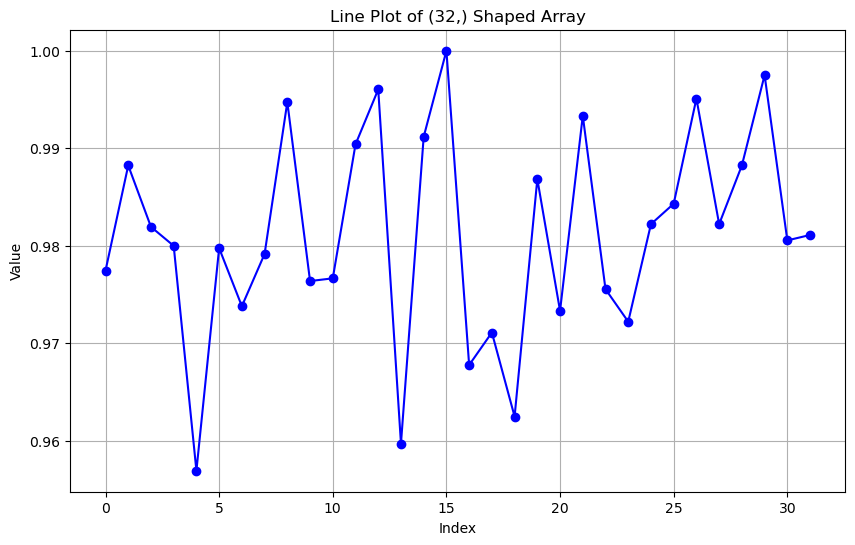

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(deapacc, marker='o', linestyle='-', color='b')
plt.title("Line Plot of (32,) Shaped Array")
plt.xlabel("Index", fontname='TimesNewRoman')
plt.ylabel("Value", fontname='TimesNewRoman')
plt.grid(True)
plt.show()

In [18]:
import torch
import numpy as np

In [2]:
base_x = torch.load('/home/sjf/eegall/data/DEAP/all_base1_de_features.pt').float()
harm_x = torch.load('/home/sjf/eegall/data/DEAP/all_harmon1_de_features.pt').float()
all_labels = torch.load('/home/sjf/eegall/data/DEAP/all_1labels.pt')
base_graph = torch.load('/home/sjf/eegall/data/DEAP/base1_graph.pt')
harm_graph = torch.load('/home/sjf/eegall/data/DEAP/harm1_graph.pt')

In [9]:
base_graph.shape

(32, 760, 40, 40)

In [10]:
type(base_graph)

numpy.ndarray

In [15]:
if type(base_x) == torch.Tensor:
    print('ok')

ok


In [5]:
torch.isnan(base_x).any()

tensor(False)

In [21]:
def check_nan_value(data):
    if type(data) == np.ndarray:
        has_nan = np.isnan(data).any()
        has_inf = np.isinf(data).any()
    elif type(data) == torch.Tensor:
        has_nan = torch.isnan(data).any()
        has_inf = torch.isinf(data).any()
    print(f"Nan situation: {has_nan}")
    print(f"Inf situation: {has_inf}")


In [22]:
check_nan_value(base_x)
check_nan_value(harm_x)
check_nan_value(base_graph)
check_nan_value(harm_graph)

Nan situation: False
Inf situation: False
Nan situation: False
Inf situation: False
Nan situation: False
Inf situation: False
Nan situation: False
Inf situation: False
